In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score

In [ ]:
data = pd.read_csv('ToyotaCorolla - MLR.csv')

In [ ]:
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [ ]:
# Get summary statistics
summary = data.describe()
summary

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


Visualizations

In [ ]:
# No Nulls Value
data.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


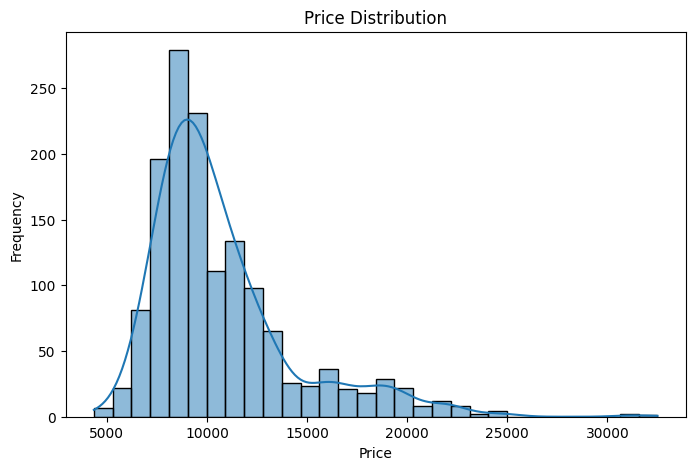

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
data1= data.copy()

In [ ]:
data1.shape
data1.duplicated().sum()
data1.duplicated()
data[data1.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [ ]:
data1.duplicated().sum()

1

In [ ]:
data1.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1431,False
1432,False
1433,False
1434,False


In [ ]:
data[data1.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [ ]:
data1 = data.drop_duplicates(ignore_index=True)

In [ ]:
numerics = ['Price', 'Age_08_04','KM','HP','Automatic','Cylinders','cc','Doors','Gears','Weight']

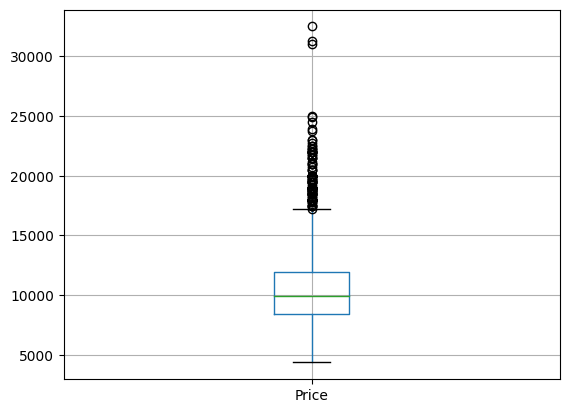

In [ ]:
data1.boxplot('Price')
plt.show()

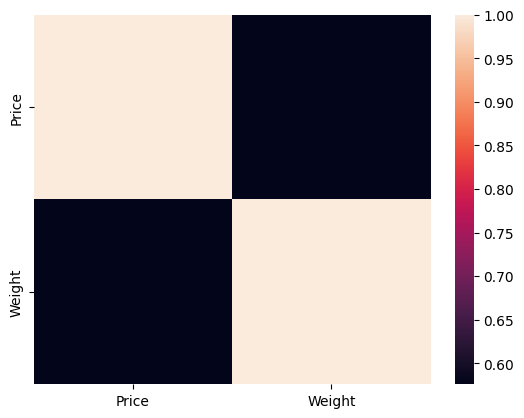

In [ ]:
sns.heatmap(data1[['Price','Weight']].corr())
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lab_encoder = LabelEncoder()
data1['Fuel_Type'] = lab_encoder.fit_transform(data1['Fuel_Type'])
data1['Fuel_Type']

<ipython-input-20-0dd0c8ebf75e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Fuel_Type'] = lab_encoder.fit_transform(data1['Fuel_Type'])


,Fuel_Type
0,1
1,1
2,1
3,1
4,1
...,...
1430,2
1431,2
1432,2
1433,2


In [ ]:
# Define features and target variable
X = data.drop('Price', axis=1)
y = data['Price']

# Splitting dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

Basic Linear Regression

In [ ]:
linear_model = LinearRegression()

In [ ]:
target = data1['Price']

In [ ]:
features = data1.drop('Price', axis=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=42)

In [ ]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = linear_model.predict(x_test)

In [ ]:
linear_model.score(x_train,y_train)

0.8694838434310366

In [ ]:
y_pred

array([10771.2771743 , 10336.13685636,  9300.14645287,  9383.27822615,
        8435.76785895,  8445.30068545,  7936.52725684,  8286.94272138,
       11767.14335883, 12375.17502016,  9479.95897656,  9353.10818538,
       13188.73160423, 12233.66757083,  8967.21646198, 11552.49130967,
       12313.21744619, 17508.98900451,  9955.97624331, 11465.13575011,
       11490.36200939, 18077.25831313,  9819.07059707, 10397.12949576,
        7419.22646204, 16012.96400703,  7106.33604153,  8333.42756975,
       15617.83563246, 13859.06122019,  8182.55429566, 10474.07520907,
       10113.64693143, 10140.65103679, 10035.58555088,  8641.96418298,
        8828.64778893, 10006.4081339 , 16328.91829034, 10681.62924074,
        8767.35122328,  9543.94520414, 10172.74049349,  8543.02605237,
       10585.06079855, 17603.67456708, 10440.81994029,  9228.6621402 ,
       10687.78430641, 12510.29417278, 12854.76621102,  6285.62577759,
       14905.09873082, 16323.27129081,  6059.43754006,  7788.36653087,
      

In [ ]:
linear_model.intercept_

-12491.869433354335

In [ ]:
r2_score(y_test,y_pred)

0.832747199599305

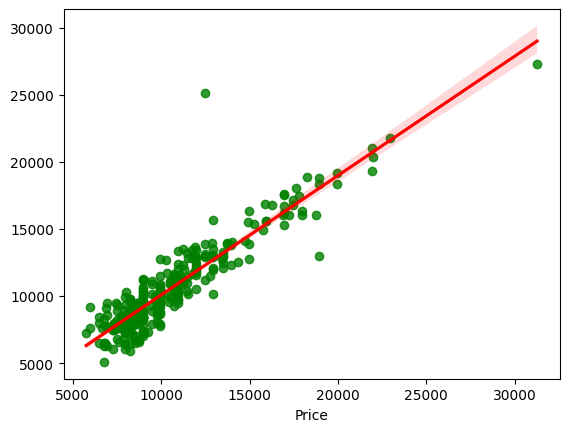

In [ ]:
sns.regplot(data=data1,x=y_test,y=y_pred,scatter_kws={'color':'green'},line_kws={'color':'red'})
plt.show()

In [ ]:
import statsmodels.formula.api as smf
model1 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight+Fuel_Type',data=data1).fit()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

In [ ]:
model2 = LinearRegression()
model2.fit(x_poly_train, y_train)

LinearRegression()

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1127.
Date:                Sat, 21 Sep 2024   Prob (F-statistic):               0.00
Time:                        09:18:26   Log-Likelihood:                -12362.
No. Observations:                1435   AIC:                         2.474e+04
Df Residuals:                    1426   BIC:                         2.479e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9852.8426   1478.988     -6.662      0.000   -1.28e+04   -6951.617
Age_08_04   -123.2082      2.608    -47.237      0.000    -128.325    -118.092
KM            -0.0177      0.001    -13.494      0.000      -0.020      -0.015
HP            23.2994      2.872      8.114      0.000      17.666      28.932
cc            -0.0418      0.090     -0.465      0.642      -0.218       0.134
Doors        -35.7894     40.222     -0.890      0.374    -114.690      43.112
Gears        582.2973    196.381      2.965      0.003     197.070     967.525
Weight        20.9344      1.014     20.653      0.000      18.946      22.923
Fuel_Type    617.0386    145.592      4.238      0.000     331.441     902.637
==============================================================================
Omnibus:                      270.225   Durbin-Watson:                   1.608
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2870.669
Skew:                          -0.545   Prob(JB):                         0.00
Kurtosis:                       9.843   Cond. No.                     3.29e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Evaluate models
mse1, r2_1 = evaluate_model(model1, x_test, y_test)
mse2, r2_2 = evaluate_model(model2, x_poly_test, y_test)


print(f'Model 1: MSE={mse1}, R2={r2_1}')
print(f'Model 2: MSE={mse2}, R2={r2_2}')


Model 1: MSE=1886450.060212244, R2=0.8427582707591954
Model 2: MSE=4203498.638309065, R2=0.6496247588580641


Lasso Regression

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

mse_lasso, r2_lasso = evaluate_model(lasso, x_test, y_test)
print(f'Lasso Regression: MSE={mse_lasso}, R2={r2_lasso}')

Lasso Regression: MSE=2006327.6747152614, R2=0.8327660828930633


Ridge Regression

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)

mse_ridge, r2_ridge = evaluate_model(ridge, x_test, y_test)
print(f'Ridge Regression: MSE={mse_ridge}, R2={r2_ridge}')

Ridge Regression: MSE=2006375.2211472443, R2=0.8327621197437906


Interview Questions:

1.What is Normalization & Standardization and how is it helpful?

 ** Normalization**: This is the process of scaling features to a range of [0, 1] or [-1, 1], which ensures that all features contribute equally to the distance calculation in models like K-nearest neighbors (KNN) or neural networks. Min-Max Scaling is a common method for normalization.



  **Standardization:** Standardization scales the data to have a mean of 0 and a standard deviation of 1. This is useful in algorithms like linear regression, where features with vastly different ranges can distort model performance. Z-score scaling is a common method



  Both processes help improve model performance and convergence speed by handling features on different scales.

2.What techniques can be used to address multicollinearity in multiple linear regression?


1.Remove Highly Correlated Predictors
2.Principal Component Analysis (PCA)
3.Regularization Techniques
4.Variance Inflation Factor (VIF)
5.Partial Least Squares Regression (PLS)